# Customer Market Segmentation

Optimize marketing strategy to launch a targeted campaign by performing customer segmentation

## Background and Business Problem

Marketing is really crucial for the growth and sustainability of any business. Marketeres can help build the company's brand, engage customers, grow revenue, and increase sales. 

### Marketer's Values 
The followings are 4 elements that marketers can deliver:
1. __Growth__. Marketers empower business growth by reaching new customers. 
2. __Education__. Marketers educate and communicate value proposition to customers. 
3. __Engagement__. Marketers engage customers and understand their needs.
4. __Drive Sales__. Marketers drive sales and traffic to product / services. 


### Marketer's Pain Points
- One of the key pain points for marketers is to know their customers and identify their needs.
- By understanding the customers, the marketers can launch a targeted marketin campaign that is tailored for specific needs.
- If the data about the customers is available, data science can be applied to perform market segmentation. 

### Case Study
- In this case study, you have been hired as a consultant to a bank in a New York City.
- The bank has extensive data on their customers for the past 6 months.
- The marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customers into at least 3  distinctive groups. 

In [2]:
# import all the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

# Display all the columns in pandas without being truncated
pd.options.display.max_columns = None

## Load the Dataset

The followings are the column descriptions for the dataset:
- `CUST_ID`: Identification of credit card holder.
- `BALANCE`: Balance amount left in customer's account to make purchase.
- `BALANCE_FREQUENCY`: How frequent the balance is updated, scored between 0 and 1. (1 = frequently updated, 0 = not frequently updated).
- `PURCHASES`: Amount of purchases made from account.
- `ONEOFF_PURCHASES`: Maximum purchase amount done in one-go.
- `INSTALLMENT_PURCHASES`: Amount of purchase done in installment.
- `CASH_ADVANCE`: Cash in advance given by the user.
- `PURCHASES_FREQUENCY`: How frequently the purchase are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- `ONEOFF_PURCHASES_FREQUENCY`: How frequently purchases are happeing in one-go (1 = frequently purchased, 0 = not frequently purchased).
- `PURCHASES_INSTALLMENTS_FREQUENCY`: How frequently purchases in installment are being done (1 = frequently done, 0 = not frequently done).
- `CASH_ADVANCE_FREQUENCY`: How frequently the cash in advance being paid.
- `CASH_ADVANCE_TRX`: Number of transactions made with "Cash in Advance".
- `PURCHASES_TRX`: Numbe of purchases transactions made.
- `CREDIT_LIMIT`: Limit of credit card for user.
- `PAYMENTS`: Amount of payment done by user.
- `MINIMUM_PAYMENTS`: Minimum amount of payments made by user.
- `PRC_FULL_PAYMENTS`: Percent of full payment paid by user.
- `TENURE`: Tenure of credit card service for user.

In [3]:
cc_df = pd.read_csv('Datasets/Marketing_data.csv')
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Analysis and Visualization

In [4]:
cc_df.info()
cc_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


__Quick Insight__:
- The mean balance is \$1564
- The balance frequency is frequently updated on average ~ 0.9
- Purchases average is \$1000
- One-off purchase average is \$600
- Average purchase frequency is around 0.5
- Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low.
- Average credit limit ~ \$4500
- Percent of full payment is 15% on average.
- Average tenure is 11 years.

In [5]:
# Let's see  who made one-off purchase of $40761.25
cc_df[cc_df.ONEOFF_PURCHASES == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


It seems that for this type of particular customer, they made a lot of purchases and one-off purchases as well, but they didn't use cash advance. Hence, __it doesn't make sense to target them and launch a targeted marketing campaign by sending them emails about cash advance__, since they don't generally use it.

The process here is that we are trying to understand the customer behavior.

In [6]:
# Let's see the customer with the highest cash advance
cc_df[cc_df.CASH_ADVANCE == cc_df.CASH_ADVANCE.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


For this type of customer, they made many cash advance transactions. However, they never paid the credit card in full. 

Another interesting fact is that, compared to the previous customer, this one made a lot of cash advance transactions, but with low purchase transactions. 

## Missing Value
We can use a heatmap to identify missing values in the dataset.

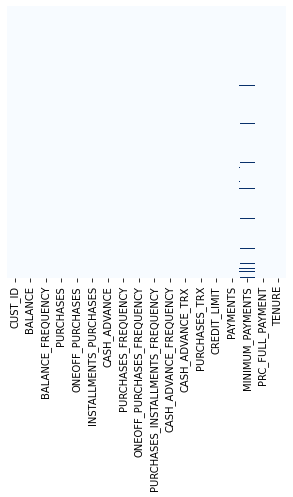

In [7]:
plt.figure( figsize=(5,5))
sns.heatmap( cc_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.show()

In [8]:
cc_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

It seems that we have missing values in column CREDIT_LIMIT and MINIMUM_PAYMENTS. 
Let's take a look at the data:

In [9]:
cc_df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].describe()

,CREDIT_LIMIT,MINIMUM_PAYMENTS
count,8949.000000,8637.000000
mean,4494.449450,864.206542
std,3638.815725,2372.446607
min,50.000000,0.019163
25%,1600.000000,169.123707
50%,3000.000000,312.343947
75%,6500.000000,825.485459
max,30000.000000,76406.207520


I think it is reasonable to replace the missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS with their average values (mean).

In [10]:
# Fill up the missing element with the mean of CREDIT_LIMIT
cc_df.loc[cc_df.CREDIT_LIMIT.isnull() == True, 'CREDIT_LIMIT'] = cc_df.CREDIT_LIMIT.mean()

In [11]:
# Fill up  the missing element with the mean of MINIMUM_PAYMENTS
cc_df.loc[cc_df.MINIMUM_PAYMENTS.isnull() == True, 'MINIMUM_PAYMENTS'] = cc_df.MINIMUM_PAYMENTS.mean()

In [12]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Congrats!! We just managed to handle missing values in the dataset.

## Drop Unrelated Columns

In general, the customer id will not generate any useful insight in the analysis. Hence, we can drop it. However, let's take a look first for some duplicated values in the column if any.

In [13]:
cc_df.CUST_ID.duplicated().value_counts()

False    8950
Name: CUST_ID, dtype: int64

In [14]:
cc_df.drop(columns = ['CUST_ID'], inplace=True)

In [15]:
cc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
print('The number of columns in the dataset:', len(cc_df.columns))
print(cc_df.columns)

The number of columns in the dataset: 17
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


## Distplot

Distplot combines the matplotlib.hist function with seaborn kde plot.
- KDE preents the Kernel Density Estimate that is used to visualize the Probability Density of a continuous variable.
- KDE demonstrates the probability density at different values in a continuous variable.

C:\Users\Diardano Raihan\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Diardano Raihan\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Diardano Raihan\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

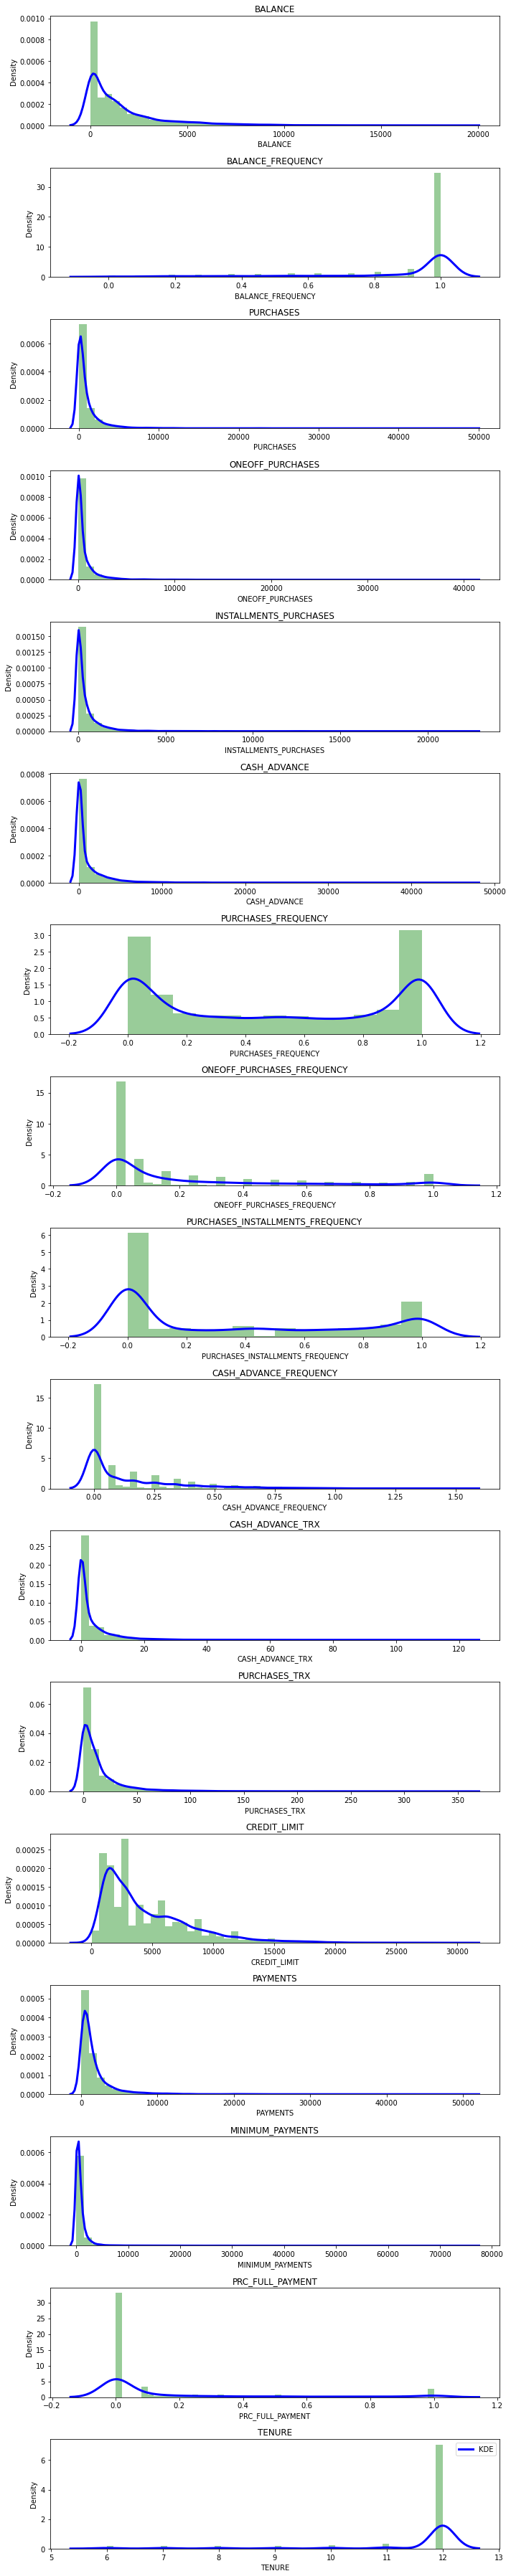

In [17]:
columns = cc_df.columns
plt.figure( figsize=(10,50))
for i in range(len(columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(cc_df[columns[i]], kde_kws={'color': 'b', 'lw': 3, 'label':'KDE'}, hist_kws={'color': 'g'})
    plt.title(columns[i])

plt.legend()
plt.tight_layout()
plt.show()

__Analysis__:
- In the BALANCE, most of the customers are around 1500.
- In the BALANCE FREQUENCY, most of the customers are also updating their balance frequently.
- In the PURCHASES, the mean is around 1000.
- In the PURCHASES FREQUENCY, we kind of have 2 groups of customers, either they use or don't use the credit card with the purchase frequently.
- In the ONE-OFF PURCHASES FREQUENCY and CASH-ADVANCE FREQUENCY, it seems that not a lot of users do this. 
- In the PRC_FULL_PAYMENT, unfortunately not a lot of customers pay the credit card fully. So, most of them don't pay it in full.
- In the TENURE, most of the customers here are around 11 - 12 years, with the minimum tenure is around 6 years.

## Heat Map Correlation

<AxesSubplot:>

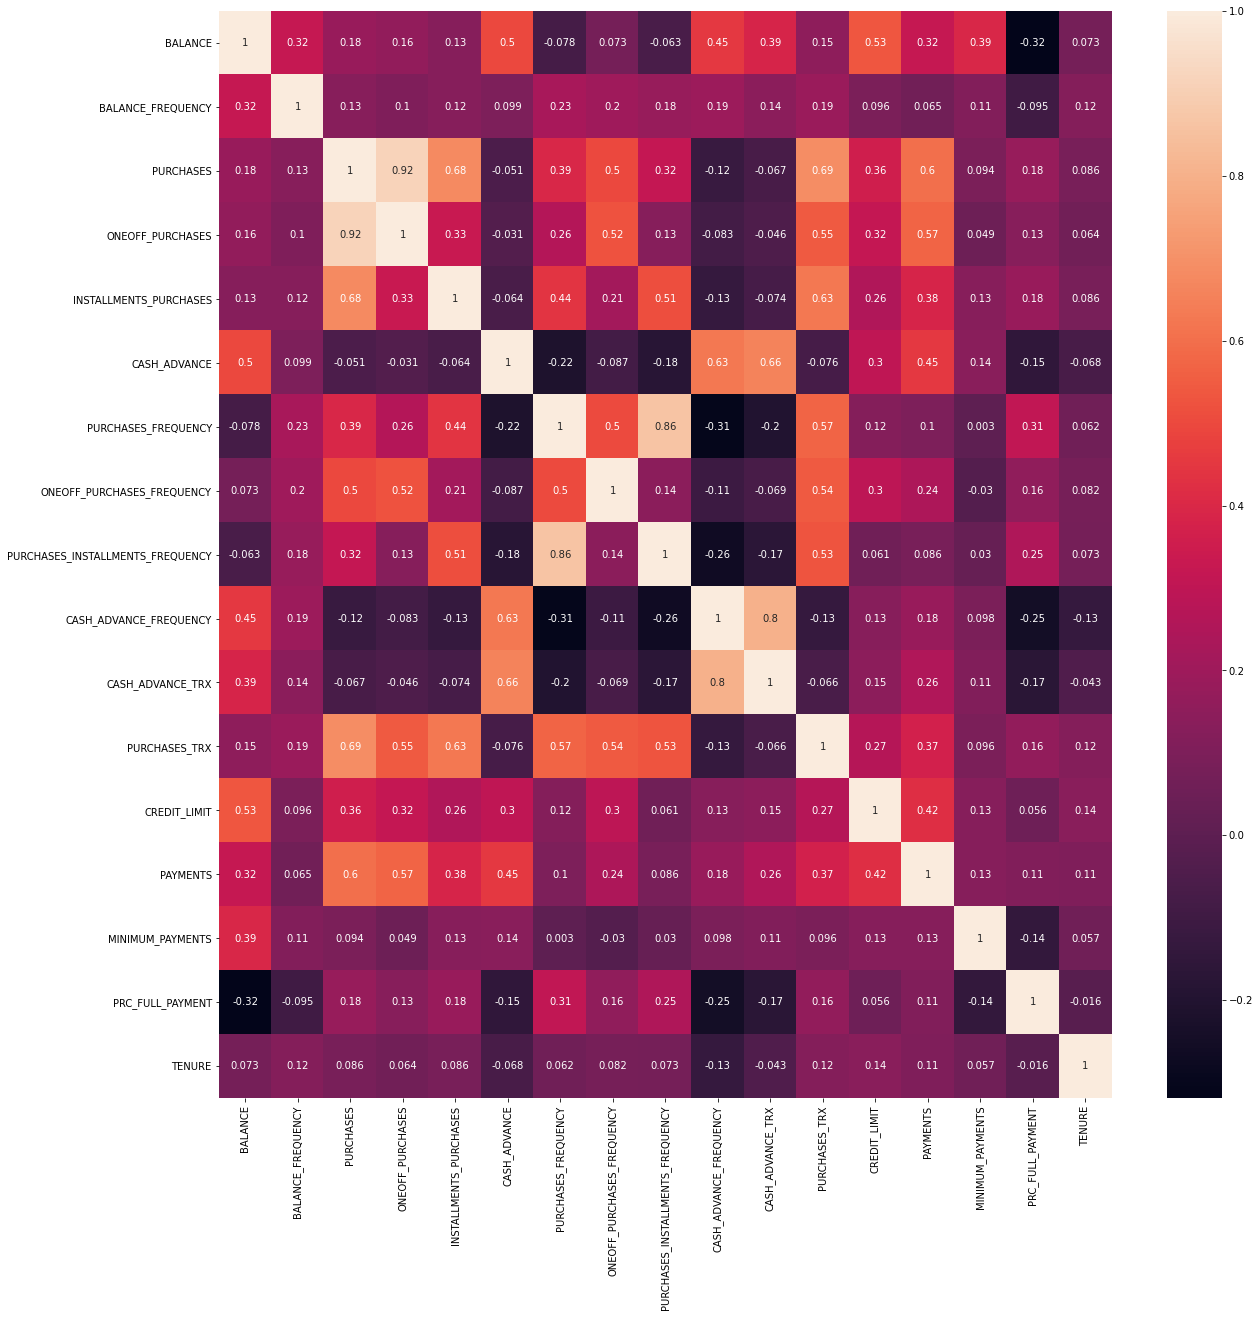

In [18]:
plt.figure( figsize=(20,20))
sns.heatmap(cc_df.corr(), annot=True)

__Analysis__:
- We can see a strong correlation between the PURCHASES and ONE-OFF PURCHASES, with the score is 0.91. It seems that the customers who make purchases, they do one-off purchases too which makes sense. 
- There is a positive correlation between PURCHASES FREQUENCY and PURCHASES INSTALLMENT FREQUENCY.
- There is a strong correlation too between PURCHASES and INSTALLMENT PURCHASES. 

In [20]:
 cc_df.to_csv('Datasets/cc_df.csv', index=False)